In [16]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.ndimage.filters import gaussian_filter1d
import itertools
import os
import pandas as pd
import matplotlib as mpl
import torch

mpl.rcParams.update(mpl.rcParamsDefault)
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#print(mpl.rcParams.keys())
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams["mathtext.default"] = 'bf'
mpl.rcParams['xtick.major.width'] = 20
#plt.rcParams['text.usetex'] = True

/tmp/ipykernel_31356/2772815531.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [328]:
#mpl.rcParams.keys()

In [10]:

#rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

def plot_fisher_approximation_error(results):
    
    iterations = results["iterations"]
    
    erreur_kfac = np.array(results["kfac"],dtype=np.float64)
    
    erreur_kfac_sp = np.array(results["kfac_sp"],dtype=np.float64)
    
    erreur_kpsvd = np.array(results["kpsvd"],dtype=np.float64)
    
    erreur_kpsvd_sp = np.array(results["kpsvd_sp"],dtype=np.float64)
    
    erreur_cor = np.array(results["kfac_cor"],dtype=np.float64)
    
    erreur_cor_sp = np.array(results["kfac_cor_sp"],dtype=np.float64)
    
    erreur_lzs = np.array(results["lzs"],dtype=np.float64)
    
    erreur_lzs_sp = np.array(results["lzs_sp"],dtype=np.float64)
    
    erreur_d = np.array(results["kpsvd_d"],dtype=np.float64)
    
    erreur_d_sp =  np.array(results["kpsvd_d_sp"],dtype=np.float64)
    
    iteras_d = np.array(results["iteras_d"],dtype=np.float64)
    
    betas_d = np.array(results["betas_d"],dtype=np.float64)
    
    iteras_lzs = results["iteras_lzs"]
    
    iteras_cor = results["iteras_cor"]
    
    iteras_kp  = results["iteras_kp"]
    
    betas_lzs = results["betas_lzs"]
    
    betas_cor = results["betas_cor"]
    
    betas_kp = results["betas_kp"]
    
    k = 2500
    
    sigma = 5
    
    x_axis = 5
    
    y_axis = 5
    
    font = {
        'color':  'black',
        'weight': 'bold',
        'size': 25,
        }
    
    fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,10)
                          )
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

    with plt.style.context('seaborn-white'):

        y_kfac = gaussian_filter1d(erreur_kfac[0:k], sigma=sigma)
        
        y_kpsvd = gaussian_filter1d(erreur_kpsvd[0:k], sigma=sigma)
        
        y_cor =  gaussian_filter1d(erreur_cor[0:k], sigma=sigma)
        
        y_lzs = gaussian_filter1d(erreur_lzs[0:k], sigma=sigma)
        
        y_kpsvd_d = gaussian_filter1d(erreur_d[0:k], sigma=sigma)
        
        ax[0].plot(iterations[0:k],y_kfac,label="KFAC",color="red",linewidth=2)
        
        ax[0].plot(iterations[0:k],y_kpsvd,label="KPSVD",color="green",linewidth=2)
        
        ax[0].plot(iterations[0:k],y_cor,label="KFAC_COR",color="blue",linewidth=2)
        
        ax[0].plot(iterations[0:k],y_lzs,label="LANCZOS",color="black",linewidth=2)
        
        ax[0].plot(iterations[0:k],y_kpsvd_d,label="DEFLATION",color="m",linewidth=2)
        
        ax[0].set_xlabel("Iteration",fontdict=font)
        
        #plt.ylabel("$\\frac{||F_{exact}-F_{approx}\||_F}{||F_{exact}||_F}$",fontdict=font)
        
        ax[0].set_ylabel("Error 1",fontdict=font)
        
        #ax[0].set_yscale('log')
        
        #ax[0].legend(loc='best')
        
        #plt.title("Relative error between Frobenius norm of matrices",fontdict=font)
        
        #plt.ylim(0,1)
        
        #ax[0].set_ylim(0, 1) 
        
        #plt.grid(True)
        
        #ax[0].grid(True) 
        
        #ax[0].set_title("MNIST",fontdict=font)
        
        #ax[0, 0].show()
        
    
    with plt.style.context('seaborn-white'):
        
        #plt.figure(figsize=(x_axis,y_axis))
        
        y_kfac_sp = gaussian_filter1d(erreur_kfac_sp[0:k], sigma=sigma)
        
        y_kpsvd_sp = gaussian_filter1d(erreur_kpsvd_sp[0:k], sigma=sigma)
        
        y_cor_sp =  gaussian_filter1d(erreur_cor_sp[0:k], sigma=sigma)
        
        y_lzs_sp =  gaussian_filter1d(erreur_lzs_sp[0:k], sigma=sigma)
        
        y_d_sp =  gaussian_filter1d(erreur_d_sp[0:k], sigma=sigma)
        
        ax[1].plot(iterations[0:k],y_kfac_sp,label="kfac",color="red",linewidth=2)
        
        ax[1].plot(iterations[0:k],y_kpsvd_sp,label="kpsvd",color="green",linewidth=2)
        
        ax[1].plot(iterations[0:k],y_cor_sp,label="kfac_cor",color="blue",linewidth=2)
        
        ax[1].plot(iterations[0:k],y_lzs_sp,label="lzs",color="black",linewidth=2)
        
        ax[1].plot(iterations[0:k],y_d_sp,label="kpsvd_d",color="m",linewidth=2)
        
        ax[1].set_xlabel("Iteration",fontdict=font)
        
        #plt.ylabel("$\\frac{||SP_{F_{exact}}-SP_{F_{approx}}||_{l_2}}{||SP_{F_{approx}}||_{l_2}}$",fontdict=font)
        
        ax[1].set_ylabel("Error 2",fontdict=font)
        
        #ax[1].set_ylim(0, 1) 
        
        #ax[1].set_yscale('log')
        
        #plt.legend(loc='best')
        
        #plt.title("Relative error between $l_2$ norm of spectres",fontdict=font)
        
        #ax[1].grid(True)
        
        plt.show()
        
        
    #fig.savefig("KPSVD/Figures/CURVES_Fishers.jpg", format='JPEG',dpi=600,transparent = True, bbox_inches = 'tight')
   

In [5]:
results = np.load('results/kpsvd_approx/CURVES/fishers.npy',allow_pickle='TRUE').item()
#PATH="NG/FACESmodel.pt"
#checkpoint = torch.load(PATH)
#results = checkpoint["results"]


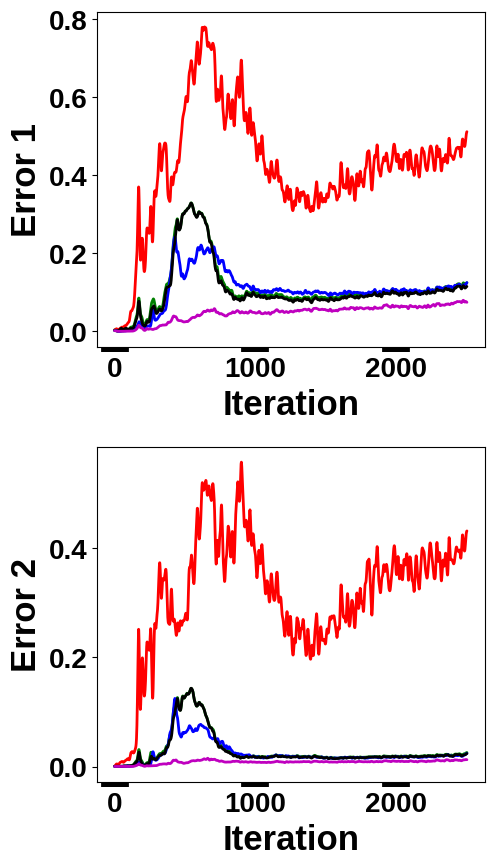

In [11]:
plot_fisher_approximation_error(results)

In [21]:
def plot_train_curves(names,colors):
    
    epochs = np.arange(1,600)
    
    #Autoencoder
    ords = ["train_loss"]
    
    absc = ['epochs'] 
    
    #CNN
    #ords = ["train_loss","val_acc"] 
    #ords = ["train_loss","train_acc"] 
    #absc=["epochs","times"]
    
    font = {
        'color':  'black',
        'weight': 'bold',
        'size': 25
        }
    
    #ords = ['train_itera_loss']
    
    #absc = ['train_itera_time','iteras']
    
    sigma = 1
    
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    
    k=-1
    
    couples = list(itertools.product([0,1],[0,1]))
    
    for y,x in  itertools.product(ords,absc):
        
        k+=1
        
        i = k
        
        #(i,j)=couples[k]
        
        #print(i,j)
        
        print(x,y)
        
        with plt.style.context('seaborn-white'):
            
            #plt.figure(figsize=(5,5))
            
            for name,color in zip(names,colors):
                
                folder = os.path.join("results/exact_ng/vgg11/outputs_512",name)
                
                results = np.load(folder+'.npy',allow_pickle='TRUE').item()
                
                #print(results)
                
                results.update({'epochs':epochs})
                
                X,Y = results[x],results[y]
                
                Y = torch.Tensor(Y).cpu()
                
                Y = np.array(Y,dtype=np.float64)
                
                Y = gaussian_filter1d(Y,sigma=sigma)
                
                if name =="kpsvd_d":
                    
                    label = "DEFLATION"
                    
                elif name=="lzs":
                    
                    label = "LANCZOS"
                    
                elif name == "kfac_2L_dd_ones":
                    
                    label = "PREVIOUS"
                    
                elif name=="kfac_2L_ones":
                    
                    label = "NICO"
                    
                elif name=="kfac_2L_span":
                    
                    label = "RESIDU"
                    
                elif name=="kfac_2L_kryl":
                    
                     label = "KRY-RESIDU"
                        
                elif name == "kfac_2L_okry":
                    
                    label = "KRY-NICO"
                    
                elif name == "kfac_2L_eige":
                    
                    label = "SPECTRAL"
                    
                else:
                    
                    label = name.upper()
                
                
                ax.plot(results[x][:len(Y)],Y,label=label,color=color,linewidth=3)
                
                #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
                
            if x=="times":
                
                ax.set_xlabel('Time (s)',fontdict=font)
                
            else:
                
                ax.set_xlabel("Epoch",fontdict=font)
                
            if y=="train_loss":
                
                ax.set_ylabel("Training loss",fontdict=font)
                
            elif y=="val_loss":
                
                ax.set_ylabel("Validation loss",fontdict=font)
                
            elif y=="train_acc":
                
                ax.set_ylabel('Train accuracy',fontdict=font)
                
            elif y=="val_acc":
                
                ax[i].set_ylabel("validation accuracy",fontdict=font)
                
            elif y=="val_top5":
                
                ax.set_ylabel("validation top5 accuracy",fontdict=font)
                
            #plt.yticks(np.arange(min(Y)-1, max(Y)-1, 0.25))
            
            elif y=="train_top5":
                
                ax[i,j].set_ylabel("Train top5 accuracy",fontdict=font)
                
            elif y=="lrs":
                
                ax[i].set_ylabel("Learning rate",fontdict=font)
            
            #plt.xlim(0,12*1e3)
            
            if y in ["train_loss","val_loss"]:
                
                ax.set_yscale('log')
                
            #plt.ylim(0,0.25)
            
            #plt.yticks(np.arange(min(Y), max(Y), 1e-2))
                
            #plt.legend(loc='best')
            
            #plt.title(y + ' vs ' +  x,fontdict=font)
            
            #ax[i,j].grid(True,which="both")
            
            #ax[i].legend(loc='best')
            
            #ax[i].axis('auto')
            
            plt.show()
            
            #fig.savefig("EXACT_NG/images/VGG_NG.jpg", format='JPEG',dpi=800,transparent = True, bbox_inches = 'tight')
    

epochs train_loss


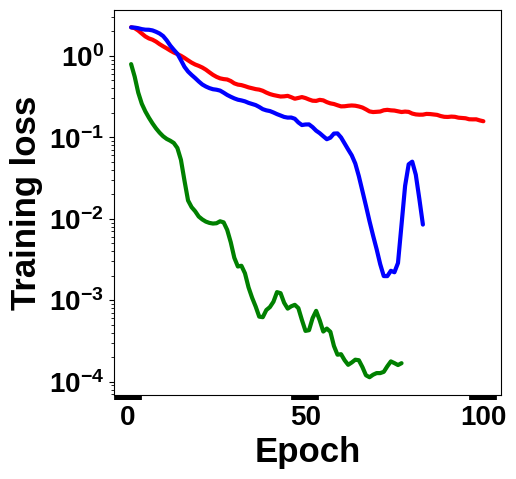

In [22]:
#names = ["kpsvd","kfac","adam","sgd","kfac_cor","kpsvd_d","lzs"]
#colors = ['green','red','orange','cyan','blue',"m","black","olive","pink","lime"]

names = ["kfac","NG","NG_BD"]
colors = ['green','red','blue','black',"m"]
plot_train_curves(names,colors)

In [23]:

def write_txt(input_folder,output_folder):
    
    results = np.load(input_folder,allow_pickle='TRUE').item()
    
    loss = list(results["train_loss"])
    
    #print(loss)
    
    epoch = list(range(len(loss)))
    
    data = np.column_stack([epoch, loss])
    #data = [epoch,loss]
    
    #datafile_path = f'{output_folder}.txt'
    
    file_name = f'{output_folder}.csv'
    
    #np.savetxt(datafile_path , data, fmt=['%d','%1.4e'], header="epoch,loss",delimiter=',')
    
    df = pd.DataFrame(data, columns=['epoch', 'loss'])
     
    df.to_csv(file_name, sep=',', encoding='utf-8')   
    
        
        
    
def write(input_names,output_names,input_folder,output_folder):
    
    for i,o in zip(input_names,output_names):
        
        i_folder = os.path.join(input_folder,i+'.npy')
        
        o_folder = os.path.join(output_folder,o)
        
        write_txt(i_folder,o_folder)
        
    print("Finished")
        
        

In [114]:
#input_folder = "two-level/CURVES/outputs_64/kfac"
#output_folder = "Figures_2L/CURVES/64/kfac"
#write_txt(input_folder,output_folder)

In [24]:
#input_folder = "two-level/F_MNIST/outputs_512/"
#output_folder = "Figures_2L/F_MNIST/512/"
#input_names = ["kfac","kfac_2L_ones","kfac_2L_span","kfac_2L_kryl","kfac_2L_okry","kfac_2L_eige","kfac_2L_dd_ones","sgd","adam"]
#output_names = ["KFAC","NICO","RESIDU","KRY-RESIDU","KRY-NICO","SPECTRAL","PREVIOUS","SGD","ADAM"]
#write(input_names,output_names,input_folder,output_folder)

In [85]:
def save_eps(folder_1,folder_2,folder_3,titles,output_folder):
    
    font = {#'family': 'normal',
        'color':  'black',
        'weight': 'bold',
        'size': 20
        }
    
    
    line = 2
    
    names_1 = os.listdir(folder_1)
    
    names_2 = os.listdir(folder_2)
    
    names_3 = os.listdir(folder_3)
    
    #names = ["kfac","kfac_standard","NG_BD"]
    #names_1 = names_2 = names_3 = names
    
    colors = ['green','red','cyan','blue',"m","black","olive",'orange','lime']
    
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    
    #print(names_1)
    
    with plt.style.context('seaborn-white'):
        
        for i,name in enumerate(names_1):

            data = pd.read_csv(os.path.join(folder_1,name),sep=",")
            #data =  np.load(os.path.join(folder_1,name+'.npy'),allow_pickle='TRUE').item()

            x = data["epoch"]

            y = data["loss"]
            
            #y = data["train_loss"]
            
            #x = list(range(len(y)))

            ax.plot(x,y,color=colors[i],linewidth=line,label = name[:-4])

        ax.set_ylabel("Training loss",fontdict=font)

        #ax[0].set_xlabel("Epoch"+ "\n" + "\n" + f"{titles[0]}", fontdict=font)
        ax.set_xlabel("Epoch",fontdict=font)

        ax.set_yscale('log')

        #ax[0].set_title(f"Batch size = {batches[0]}", fontdict=font)
        
        
    
    """
    with plt.style.context('seaborn-white'):
        
        for i,name in enumerate(names_2):

            data = pd.read_csv(os.path.join(folder_2,name),sep=",")
            #data =  np.load(os.path.join(folder_2,name+'.npy'),allow_pickle='TRUE').item()

            x = data["epoch"]

            y = data["loss"]
            
            #y = data["train_loss"]
            
            #x = list(range(len(y)))

            ax[1].plot(x,y,color=colors[i],linewidth=line,label = name[:-4])

        ax[1].set_ylabel("Training loss",fontdict=font)

        ax[1].set_xlabel("Epoch"+ "\n" + "\n" + f"{titles[1]}", fontdict=font)
        #ax[1].set_xlabel("Epoch",fontdict=font)

        ax[1].set_yscale('log')

        ax[1].set_title(f"Batch size = {batches[1]}", fontdict=font)
    
    
    
    with plt.style.context('seaborn-white'):
        
        for i,name in enumerate(names_3):

            data = pd.read_csv(os.path.join(folder_3,name),sep=",")
            #data =  np.load(os.path.join(folder_3,name+'.npy'),allow_pickle='TRUE').item()

            x = data["epoch"]

            y = data["loss"]
            
            #y = data["train_loss"]
            
            #x = list(range(len(y)))

            ax[2].plot(x,y,color=colors[i],linewidth=line,label = name[:-4])

        ax[2].set_ylabel("Training loss",fontdict=font)

        ax[2].set_title(f"Batch size = {batches[2]}", fontdict=font)
        
        #ax[2].set_title(f"Full batch", fontdict=font)

        ax[2].set_xlabel("Epoch"+ "\n" + "\n" + f"{titles[2]}", fontdict=font)
        #ax[2].set_xlabel("Epoch",fontdict=font)

        ax[2].set_yscale('log')
    """
    #handles, labels = ax.get_legend_handles_labels()
    
    #fig.legend(handles, labels,ncol=9, loc='upper center', prop={"size":25,"weight":'bold'})
    
    #plt.margins(0,0)
    #plt.gca().xaxis.set_major_locator(plt.NullLocator())
    #plt.gca().yaxis.set_major_locator(plt.NullLocator())
    
    fig.savefig(f'{output_folder}'+".jpg", format='JPEG',dpi=600,transparent = True, bbox_inches = 'tight')
    plt.show()
    plt.close()
    
    

In [86]:
folder_1 = "Figures_2L/data_csv/D_MNIST/512/"
folder_2 = "Figures_2L/data_csv/resnet18/128/"
folder_3 = "Figures_2L/data_csv/resnet34/512/"
#folder_1 = "EXACT_NG/toyCNN/outputs_256"
#folder_2 = "EXACT_NG/toyCNN/outputs_512"
#folder_3 = "EXACT_NG/toyCNN/outputs_1000"
batches  = ["256","128","512"]
titles = ["Cuda-convet on CIFAR10","Resnet18 on CIFAR100","Resnet34 on SVHN"]
output_folder = "Figures_2L/images_jpg/D_MNIST"


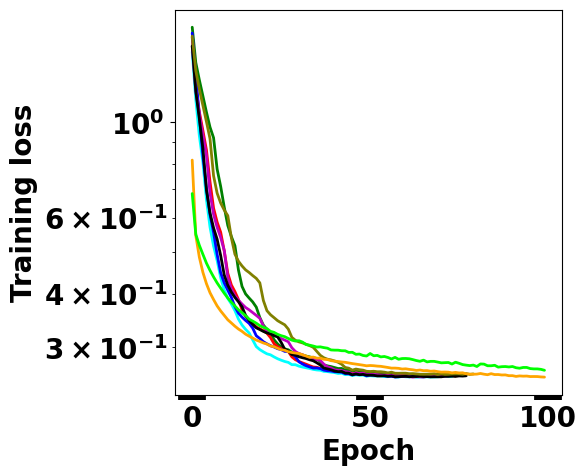

In [87]:
save_eps(folder_1,folder_2,folder_3,titles,output_folder)

In [118]:
def dispaly_residuals(names,colors):
    font = {#'family': 'normal',
        'color':  'black',
        'weight': 'bold',
        'size': 20
        }
    sigma=3
    k = 20000
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    for name,color in zip(names,colors):
        folder = os.path.join("two-level/cuda_convnet/residuals",name)
        results = np.load(folder+'.npy',allow_pickle='TRUE').item()
        x = results["iterations"][:k]
        y = results["residuals"][:k]
        y = gaussian_filter1d(y,sigma=sigma)
        
        if name == "kfac_2L_dd_ones":
                label = "PREVIOUS"
        elif name=="kfac_2L_ones":
            label = "NICO"
        elif name=="kfac_2L_span":
            label = "RESIDU"
        elif name=="kfac_2L_kryl":
             label = "KRY-RESIDU"
        elif name == "kfac_2L_okry":
            label = "KRY-NICO"
        elif name == "kfac_2L_eige":
            label = "SPECTRAL"
        else:
            label = name.upper()
        
        plt.plot(x,y,label=label,color=color,linewidth=1)
    
    plt.axhline(y=0, color='black', linestyle='-')
    #plt.legend(ncol=6, loc='best', prop={"size":25,"weight":'bold'})
    plt.xlabel("Iterations",fontdict=font)
    plt.ylabel(r"$\mathfrak{E}(\beta^*) - \mathfrak{E}(0)$",fontdict=font)
    #plt.ylim(-15000,0)
    #plt.title("Evolution de la norme du gradient")
    output_folder = "Figures_2L/images_jpg/CUDACONVNET_errors"
    plt.savefig(f'{output_folder}'+".jpg", format='JPEG',dpi=1200,transparent = True, bbox_inches = 'tight', pad_inches = 0)
    
    
    plt.show()
        


In [119]:
names =  ["kfac_2L_ones","kfac_2L_span","kfac_2L_kryl","kfac_2L_okry","kfac_2L_eige","kfac_2L_dd_ones"]
colors = ['red','cyan','blue',"m","black","olive"]

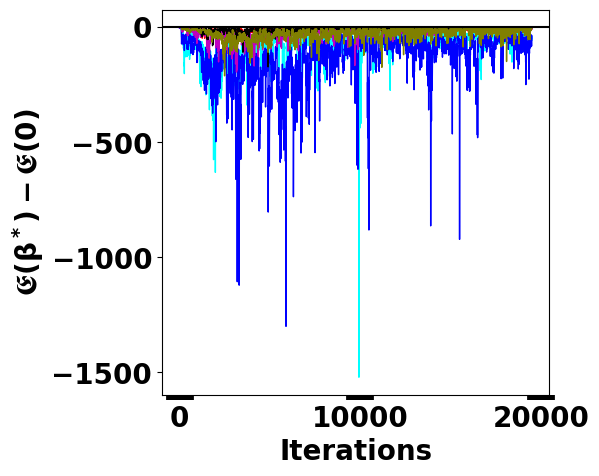

In [120]:
dispaly_residuals(names,colors)

In [28]:
def plot_sigma(results):
    
    font = {#'family': 'normal',
        'color':  'black',
        'weight': 'bold',
        'size': 15
        }
    
    iterations = results["iterations"]
    
    sigma1_lzs = results["sigma1_lzs"]
    
    sigma2_lzs = results["sigma2_lzs"]
    
    sigma1_d = results["sigma1_d"]
    
    sigma2_d = results["sigma2_d"]
    
    
    plt.plot(iterations,sigma1_lzs,label="$\sigma_1$",color="red")
    
    plt.plot(iterations,sigma2_lzs,label="$\sigma_2$",color="orange")
    
    plt.xlabel("Iterations",fontdict=font)
    
    plt.ylabel("Singular Values",fontdict=font)
    
    plt.legend(loc="best")
    
    plt.show()

In [29]:
results = np.load('results/kpsvd_approx/sigma/fishers_MNIST.npy',allow_pickle='TRUE').item()

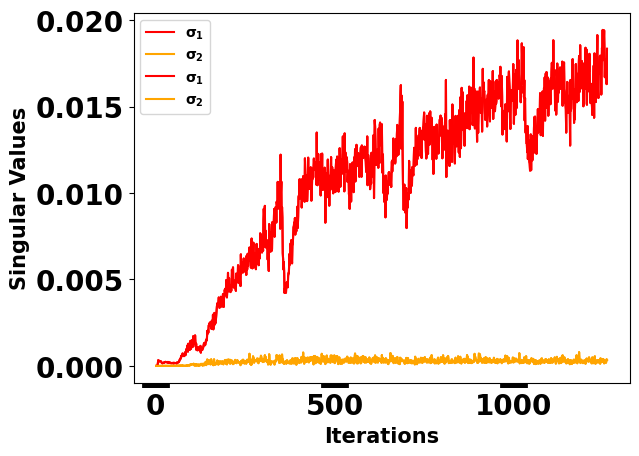

In [30]:
plot_sigma(results)